In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
#데이터 프레임 탐색 => info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
#데이터 프레임의 숫자형 데이터 값의 기초 통계량 확인 => describe
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
#범주형(categorical) 데이터를 가진 컬럼이 어떤 값을 가지고 있는지 확인하고 싶을 때 => unique()
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [8]:
#sex 컬럼의 값을 확인하기 => value_counts()
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## seaborn plot

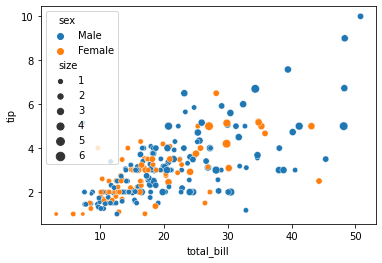

In [9]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], 
                hue=df['sex'], size=df['size']);

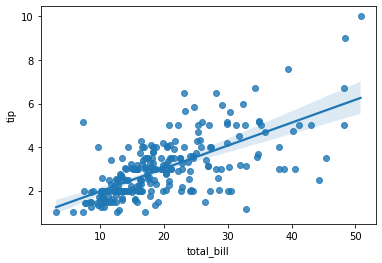

In [10]:
#confidence interval(신뢰구간)
sns.regplot(x=df['total_bill'], y=df['tip']);

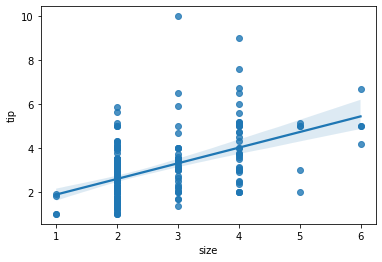

In [11]:
sns.regplot(x=df['size'], y=df['tip']);

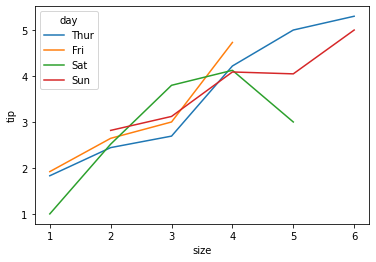

In [12]:
sns.lineplot(x=df['size'], y=df['tip'], hue=df['day'], ci=None);

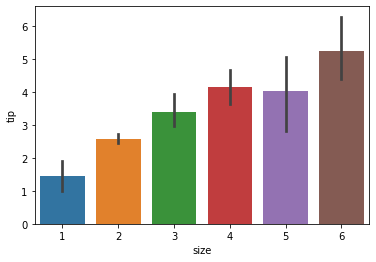

In [13]:
sns.barplot(x=df['size'], y=df['tip']);

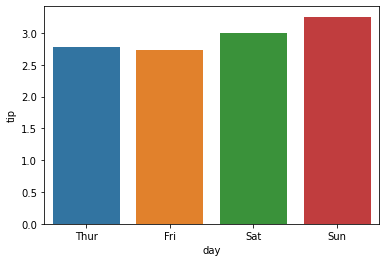

In [14]:
sns.barplot(x=df['day'], y=df['tip'], ci=None);

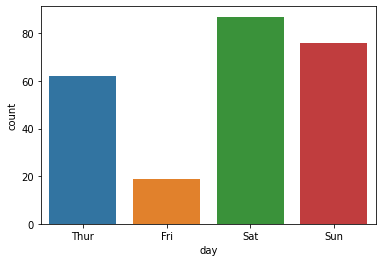

In [15]:
sns.countplot(x=df['day']);

In [16]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

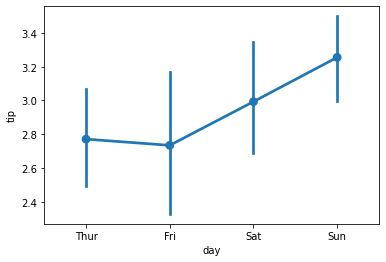

In [17]:
sns.pointplot(x=df['day'], y=df['tip']);

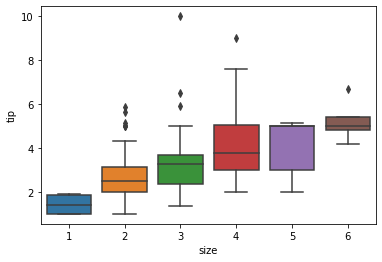

In [18]:
sns.boxplot(x=df['size'], y=df['tip']);

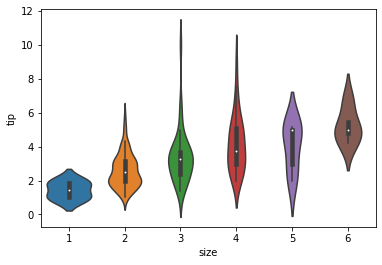

In [19]:
sns.violinplot(x=df['size'], y=df['tip']);

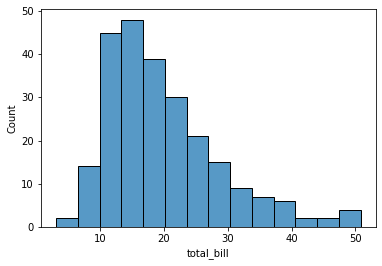

In [20]:
sns.histplot(data=df['total_bill']);

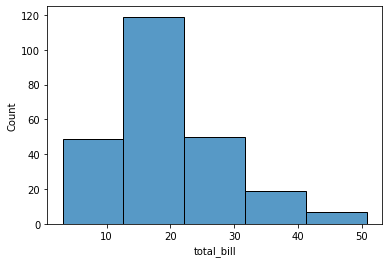

In [21]:
sns.histplot(data=df['total_bill'], bins=5);

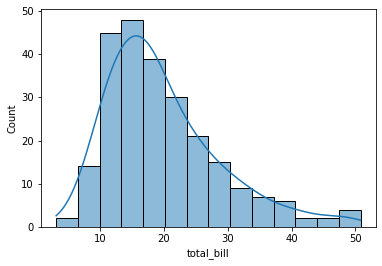

In [22]:
sns.histplot(data=df['total_bill'], kde=True);

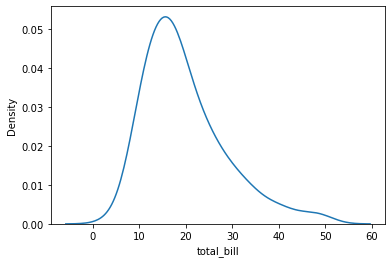

In [23]:
sns.kdeplot(data=df['total_bill']);

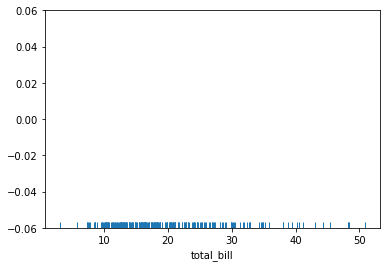

In [24]:
sns.rugplot(data=df['total_bill']);

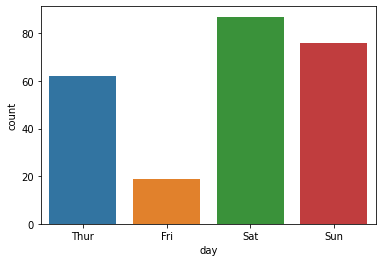

In [25]:
sns.countplot(x=df['day']);

## heatmap

In [26]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
pivot_df = df.pivot_table("tip", "day", "size")
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


In [28]:
#aggfunc(sum, mean, count...) : 데이터 축약 함수
df.pivot_table("tip", "day", "size", aggfunc='count')

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [29]:
pivot_df.fillna(0, inplace=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,0.000000,0.0
Sat,1.00,2.517547,3.797778,4.123846,3.000000,0.0
Sun,0.00,2.816923,3.120667,4.087778,4.046667,5.0


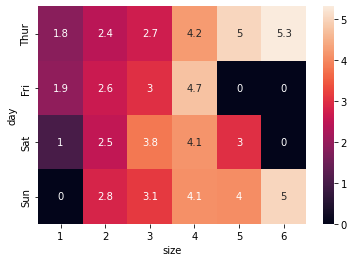

In [30]:
sns.heatmap(pivot_df, annot=True);

In [31]:
df['tip_rate'] = df['tip']/df['total_bill']

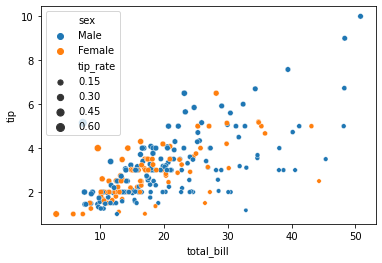

In [32]:
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['tip_rate'])
#loc : 범례의 위치를 지정
plt.legend(loc='upper left')
plt.show()